# Imports

In [124]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, classification_report, confusion_matrix, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

# Data Exploration

In [130]:
X = pd.read_csv("data_Features.csv")
X.head()

,time,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR
0,2013-01-01,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0
1,2013-01-02,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0
2,2013-01-03,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0
3,2013-01-04,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0
4,2013-01-05,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0


In [131]:
X.describe()

,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,-10.190040,0.139648,0.626351,-0.858922,73.267808,18.789275,11.522362,1.328740,4.382248,5.191286
std,10.340583,5.013640,3.955417,1.446165,29.250724,47.703600,27.942124,3.393452,12.971518,13.406972
min,-32.019122,-13.846656,-12.316128,-1.692462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-19.877500,-3.610168,-2.079422,-1.689860,70.000000,0.123798,0.121437,0.000000,0.000000,0.000000
50%,-9.596479,-0.187084,0.912780,-1.689860,84.601769,0.481870,0.481870,0.000000,0.000000,0.000000
75%,0.167824,3.807440,3.483397,-0.297573,90.362319,4.080174,3.961181,0.004413,0.010148,0.000150
max,7.840619,14.640913,12.811255,6.054536,99.500682,479.722174,281.673389,23.241791,115.876574,88.054318


In [148]:
y = pd.read_csv("data_Targets.csv")

In [133]:
X.dtypes

time       object
t2m       float64
u10       float64
v10       float64
SST       float64
SIC       float64
r1_MAR    float64
r2_MAR    float64
r3_MAR    float64
r4_MAR    float64
r5_MAR    float64
dtype: object

In [149]:
y.head()

,Unnamed: 0,Y1,Y3,Y4,Y5
0,2013-01-01,0,5,0,0
1,2013-01-02,0,0,0,0
2,2013-01-03,0,0,0,0
3,2013-01-04,0,2,0,0
4,2013-01-05,0,0,0,0


In [150]:
y.rename(columns={"Unnamed: 0" : "time"})

,time,Y1,Y3,Y4,Y5
0,2013-01-01,0,5,0,0
1,2013-01-02,0,0,0,0
2,2013-01-03,0,0,0,0
3,2013-01-04,0,2,0,0
4,2013-01-05,0,0,0,0
...,...,...,...,...,...
2551,2019-12-27,3,0,1,0
2552,2019-12-28,0,0,0,0
2553,2019-12-29,0,0,0,0
2554,2019-12-30,0,0,1,0


In [151]:
y = y["Y1"]

In [152]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2551    3
2552    0
2553    0
2554    0
2555    0
Name: Y1, Length: 2556, dtype: int64

In [153]:
print(set(y.values))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 60, 61, 62, 63, 65, 71, 72, 73, 79, 81, 84, 85, 87, 92, 94, 95, 96, 98, 100, 103, 109, 112, 113, 114, 119, 123, 126, 132, 135, 139, 168, 186, 227, 245, 256, 433}


<Axes: >

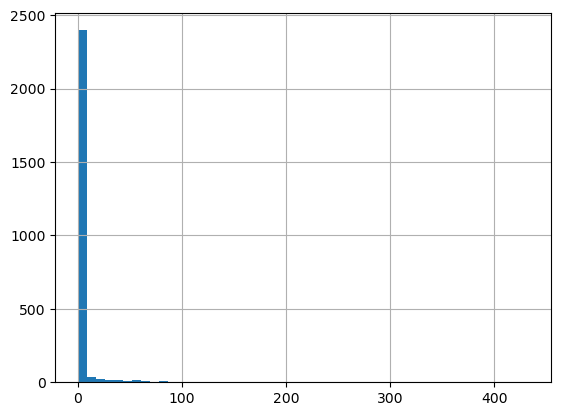

In [154]:
y.hist(bins=50)

In [155]:
print(y.describe())

count    2556.000000
mean        3.525430
std        18.977537
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       433.000000
Name: Y1, dtype: float64


In [157]:
y_bin = (y > 0).astype(int)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_bin),
    y=y_bin
)
print(dict(zip(np.unique(y_bin), class_weights)))

{0: 0.5649867374005305, 1: 4.346938775510204}


In [159]:
weights = np.array([class_weights[y_i] for y_i in y_bin])

In [142]:
y_bin

0       0
1       0
2       0
3       0
4       0
       ..
2551    0
2552    0
2553    0
2554    0
2555    0
Name: Y1, Length: 2556, dtype: int64

In [143]:
X = X.drop(columns="time")

In [144]:
X

,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR
0,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0
1,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0
2,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0
3,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0
4,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2551,-27.316822,1.597207,-0.091400,-1.689860,95.102792,0.466891,0.462179,0.0,0.0,0.0
2552,-27.998255,3.917396,0.498397,-1.690511,93.949257,0.466818,0.462108,0.0,0.0,0.0
2553,-23.289798,4.664877,2.332191,-1.689860,93.989076,0.417442,0.414464,0.0,0.0,0.0
2554,-25.674814,0.062261,3.760923,-1.689860,94.875746,0.306203,0.306203,0.0,0.0,0.0


In [145]:
X.dtypes

t2m       float64
u10       float64
v10       float64
SST       float64
SIC       float64
r1_MAR    float64
r2_MAR    float64
r3_MAR    float64
r4_MAR    float64
r5_MAR    float64
dtype: object

In [146]:
X.shape

(2556, 10)

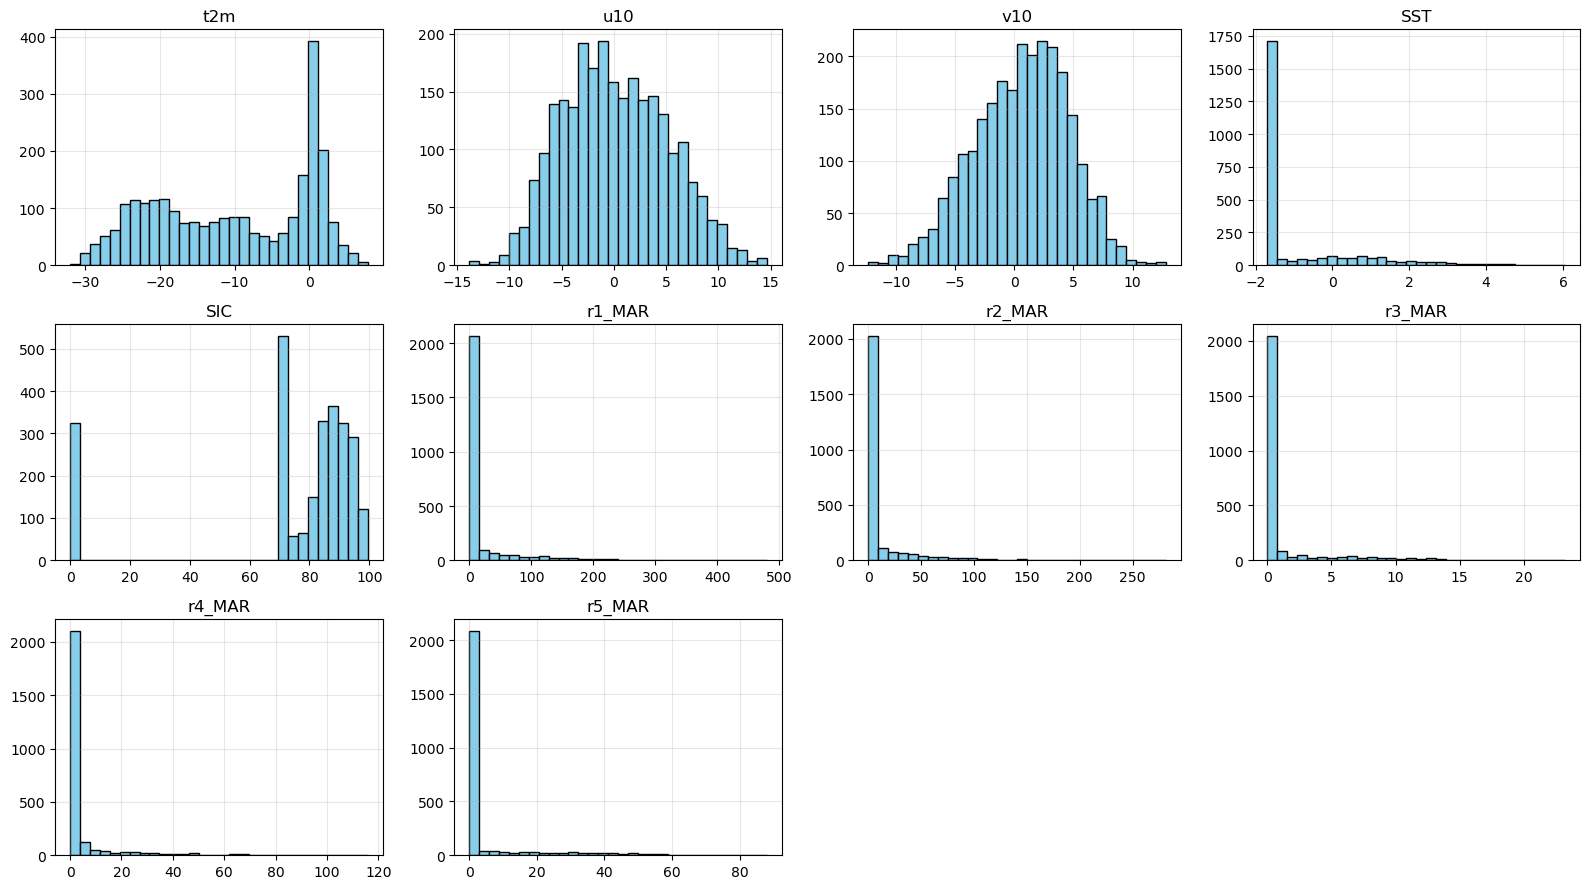

In [147]:
n_features = X.shape[1]
n_cols = 4  
n_rows = int(np.ceil(n_features / n_cols))  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3 * n_rows))

axes = axes.flatten()

for i, col in enumerate(X.columns):
    axes[i].hist(X[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].grid(alpha=0.3)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Test of different models

## Naive Bayes

### 1st try

In [163]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test, w_train, w_test= train_test_split(X,y_bin, weights, test_size=0.2,random_state=42)

model = GaussianNB()
model.fit(X_train,y_train, sample_weight=w_train)
y_pred = model.predict(X_test)

In [164]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.919921875
0.6065573770491803
0.6851851851851852
0.6434782608695652


### Cross Validation

In [171]:
kf = KFold(n_splits=5)

kf.get_n_splits(X)

scoring = {
    'accuracy': 'accuracy',
    'auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = {key: [] for key in scoring.keys()}

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_bin[train_idx], y_bin[test_idx]
    w_train = weights[train_idx]

    # Modèle Naive Bayes avec pondération
    model = GaussianNB()
    model.fit(X_train, y_train, sample_weight=w_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # nécessaire pour roc_auc

    # Calcul des scores
    results['accuracy'].append(accuracy_score(y_test, y_pred))
    results['auc'].append(roc_auc_score(y_test, y_proba))
    results['f1'].append(f1_score(y_test, y_pred))
    results['precision'].append(precision_score(y_test, y_pred))
    results['recall'].append(recall_score(y_test, y_pred))

# Moyennes sur les folds
for metric in results:
    print(f"{metric}: {np.mean(results[metric]):.4f}")

accuracy: 0.9178
auc: 0.8443
f1: 0.6718
precision: 0.6183
recall: 0.7375


In [ ]:
# cv_results

{'fit_time': array([0.00394487, 0.00101399, 0.00076103, 0.00074387, 0.0006671 ]),
 'score_time': array([0.00873017, 0.00440812, 0.0043211 , 0.00354886, 0.00382781]),
 'test_accuracy': array([0.95507812, 0.95890411, 0.97260274, 0.89823875, 0.94324853]),
 'train_accuracy': array([0.94520548, 0.9393643 , 0.9393643 , 0.95452323, 0.94425428]),
 'test_auc': array([0.87338529, 0.97530769, 0.97611111, 0.87309572, 0.9556025 ]),
 'train_auc': array([0.96120796, 0.93894148, 0.94454545, 0.95830575, 0.94976212]),
 'test_f1': array([0.5106383 , 0.8742515 , 0.83333333, 0.2972973 , 0.78195489]),
 'train_f1': array([0.75111111, 0.6374269 , 0.70334928, 0.7881549 , 0.69354839]),
 'test_precision': array([0.42857143, 0.78494624, 0.72916667, 0.18333333, 0.69333333]),
 'train_precision': array([0.63059701, 0.50697674, 0.58102767, 0.68650794, 0.56331878]),
 'test_recall': array([0.63157895, 0.98648649, 0.97222222, 0.78571429, 0.89655172]),
 'train_recall': array([0.92857143, 0.85826772, 0.89090909, 0.9251336

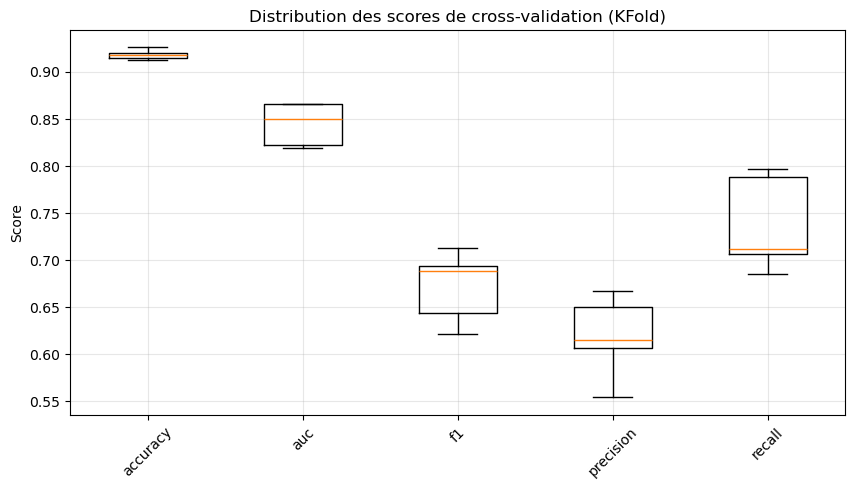

In [173]:
# Récupération des clés et valeurs
keys = list(results.keys())
values = [results[key] for key in keys]

plt.figure(figsize=(10, 5))
plt.boxplot(values)
plt.xticks(range(1, len(keys) + 1), keys, rotation=45)
plt.title("Distribution des scores de cross-validation (KFold)")
plt.ylabel("Score")
plt.grid(True, alpha=0.3)
plt.show()

### Normalization of the data

In [60]:
model = make_pipeline(StandardScaler(), GaussianNB())
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [61]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.955078125
0.6274509803921569
0.8888888888888888
0.735632183908046


### Metrics : Confusion Matrix, ROC Indicator and AUC curb

In [64]:
confusion_matrix(y_test,y_pred)

array([[457,  19],
       [  4,  32]])

In [67]:
y_score = model.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y_bin, y_score)
auc(fpr,tpr)

0.951726505476862

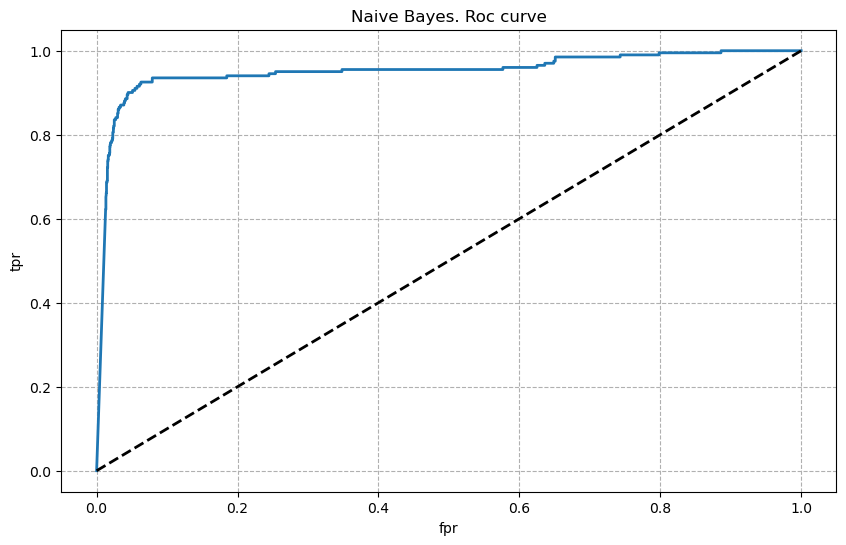

In [68]:
y_proba= model.predict_proba(X)[:,1];
fpr, tpr, thresholds= roc_curve(y_bin, y_proba);
figure= plt.figure(figsize=(10,6));
plt.plot(fpr,tpr, linewidth= 2);
plt.title('Naive Bayes. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth= 2)
plt.grid(linestyle= 'dashed') 
plt.show()

## Linear Discriminant Analysis

### 1st attempt

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y_bin,test_size=0.2,random_state=42)

lda = LinearDiscriminantAnalysis(n_components=1, store_covariance=True)

lda.fit(X_train,y_train)
y_pred_train = lda.predict(X_train)
y_pred = lda.predict(X_test)

In [71]:
acc = accuracy_score(y_train, y_pred_train)
prec = precision_score(y_train, y_pred_train, average='weighted')
rec = recall_score(y_train, y_pred_train, average='weighted')
f1 = f1_score(y_train, y_pred_train, average='weighted')

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")

print("\nClassification Report:\n", classification_report(y_train, y_pred_train))

Accuracy: 0.972
Precision: 0.971
Recall: 0.972
F1-score: 0.971

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1879
           1       0.83      0.81      0.82       165

    accuracy                           0.97      2044
   macro avg       0.91      0.90      0.90      2044
weighted avg       0.97      0.97      0.97      2044



In [72]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.971
Precision: 0.973
Recall: 0.971
F1-score: 0.972

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       476
           1       0.76      0.86      0.81        36

    accuracy                           0.97       512
   macro avg       0.87      0.92      0.89       512
weighted avg       0.97      0.97      0.97       512



### Cross Validation

In [76]:
kf = KFold(n_splits=5)

kf.get_n_splits(X)

scoring = {
    'accuracy': 'accuracy',
    'auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

cv_results = cross_validate(lda, X, y_bin, cv=kf, scoring=scoring, return_train_score=True)

In [77]:
cv_results

{'fit_time': array([0.01131129, 0.00389624, 0.00170588, 0.00193   , 0.00174403]),
 'score_time': array([0.01973987, 0.00486279, 0.00336289, 0.00358105, 0.0042491 ]),
 'test_accuracy': array([0.95898438, 0.95890411, 0.98043053, 0.95694716, 0.97260274]),
 'train_accuracy': array([0.9721135 , 0.97066015, 0.96772616, 0.97359413, 0.96919315]),
 'test_auc': array([0.728515  , 0.98759973, 0.97140351, 0.89192297, 0.95231027]),
 'train_auc': array([0.96990711, 0.94115836, 0.94280787, 0.96084284, 0.95376968]),
 'test_f1': array([0.4       , 0.84671533, 0.86111111, 0.42105263, 0.87719298]),
 'train_f1': array([0.84297521, 0.76190476, 0.79878049, 0.85326087, 0.78498294]),
 'test_precision': array([0.4375    , 0.92063492, 0.86111111, 0.33333333, 0.89285714]),
 'train_precision': array([0.84530387, 0.768     , 0.80368098, 0.86740331, 0.76666667]),
 'test_recall': array([0.36842105, 0.78378378, 0.86111111, 0.57142857, 0.86206897]),
 'train_recall': array([0.84065934, 0.75590551, 0.79393939, 0.8395721

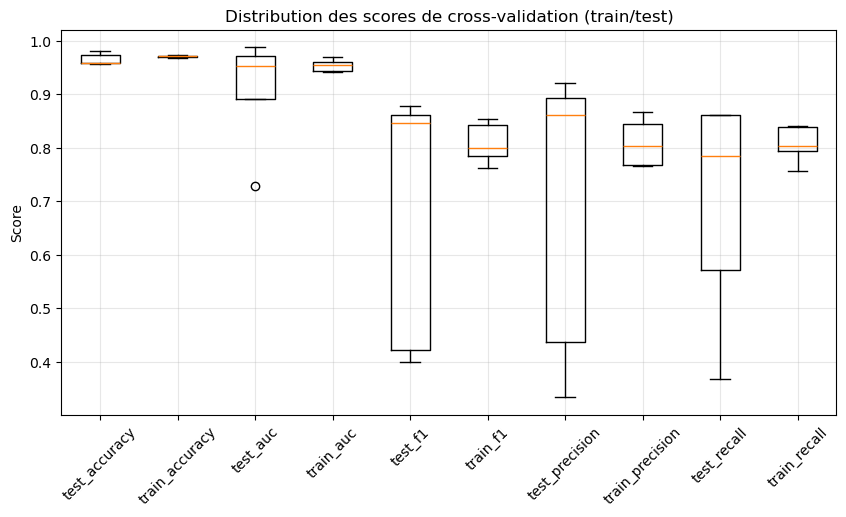

In [78]:
keys = [key for key in cv_results.keys() if key.startswith('test') or key.startswith('train')]
values = [cv_results[key] for key in keys]

plt.figure(figsize=(10, 5))
plt.boxplot(values)
plt.xticks(range(1, len(keys) + 1), keys, rotation=45)
plt.title("Distribution des scores de cross-validation (train/test)")
plt.ylabel("Score")
plt.grid(True, alpha=0.3)
plt.show()

### ROC Curb

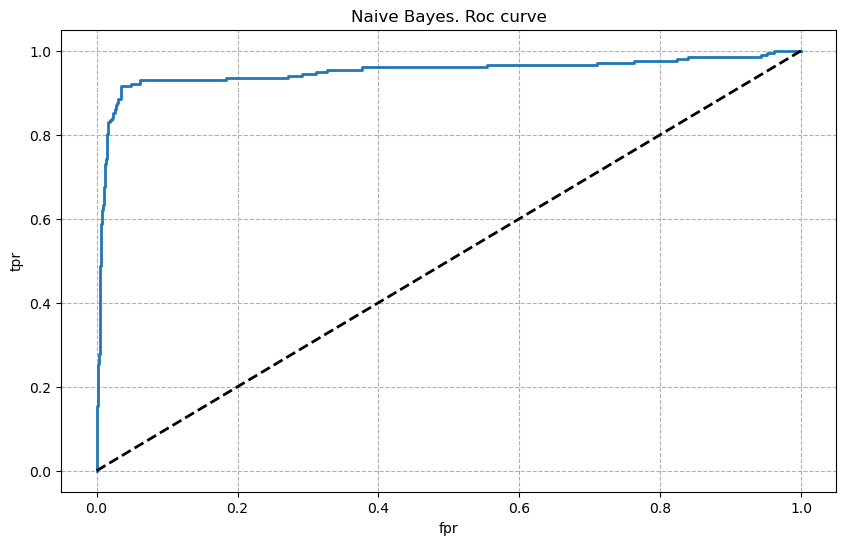

In [79]:
y_proba= lda.predict_proba(X)[:,1];
fpr, tpr, thresholds= roc_curve(y_bin, y_proba);
figure= plt.figure(figsize=(10,6));
plt.plot(fpr,tpr, linewidth= 2);
plt.title('Naive Bayes. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth= 2)
plt.grid(linestyle= 'dashed') 
plt.show()

## Quadratic Discriminant Analysis

### Naive Attempt

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y_bin, test_size=0.2, random_state=42)

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train,y_train)
y_pred = qda.predict(X_test)

In [81]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       476
           1       0.51      0.86      0.64        36

    accuracy                           0.93       512
   macro avg       0.75      0.90      0.80       512
weighted avg       0.96      0.93      0.94       512



In [82]:
accuracy_score(y_test, y_pred)

0.931640625

### Cross Validation

In [83]:
kf = KFold(n_splits=5)

kf.get_n_splits(X)

scoring = {
    'accuracy': 'accuracy',
    'auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

cv_results = cross_validate(qda, X, y_bin, cv=kf, scoring=scoring, return_train_score=True)

In [84]:
cv_results

{'fit_time': array([0.00393987, 0.00275302, 0.00270319, 0.00119495, 0.00112915]),
 'score_time': array([0.00866818, 0.01006389, 0.00534987, 0.00331903, 0.00332689]),
 'test_accuracy': array([0.94140625, 0.9334638 , 0.96477495, 0.89041096, 0.9295499 ]),
 'train_accuracy': array([0.93737769, 0.93447433, 0.93007335, 0.94523227, 0.93691932]),
 'test_auc': array([0.85598377, 0.96471643, 0.97409357, 0.87525151, 0.94534521]),
 'train_auc': array([0.95782333, 0.93562438, 0.9403804 , 0.95562188, 0.9474973 ]),
 'test_f1': array([0.4       , 0.80898876, 0.79545455, 0.28205128, 0.74647887]),
 'train_f1': array([0.72532189, 0.61714286, 0.67126437, 0.75438596, 0.66318538]),
 'test_precision': array([0.32258065, 0.69230769, 0.67307692, 0.171875  , 0.63095238]),
 'train_precision': array([0.59507042, 0.48430493, 0.54074074, 0.6394052 , 0.52916667]),
 'test_recall': array([0.52631579, 0.97297297, 0.97222222, 0.78571429, 0.9137931 ]),
 'train_recall': array([0.92857143, 0.8503937 , 0.88484848, 0.9197861

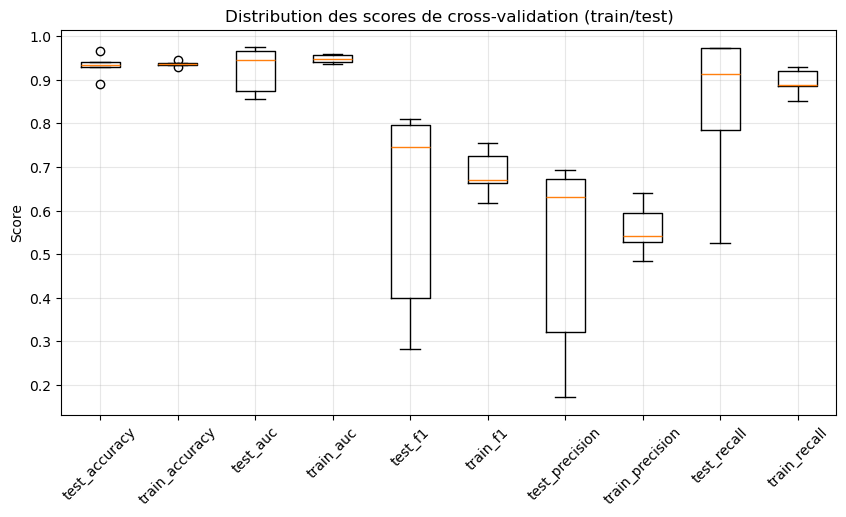

In [85]:
keys = [key for key in cv_results.keys() if key.startswith('test') or key.startswith('train')]
values = [cv_results[key] for key in keys]

plt.figure(figsize=(10, 5))
plt.boxplot(values)
plt.xticks(range(1, len(keys) + 1), keys, rotation=45)
plt.title("Distribution des scores de cross-validation (train/test)")
plt.ylabel("Score")
plt.grid(True, alpha=0.3)
plt.show()

### ROC Curb

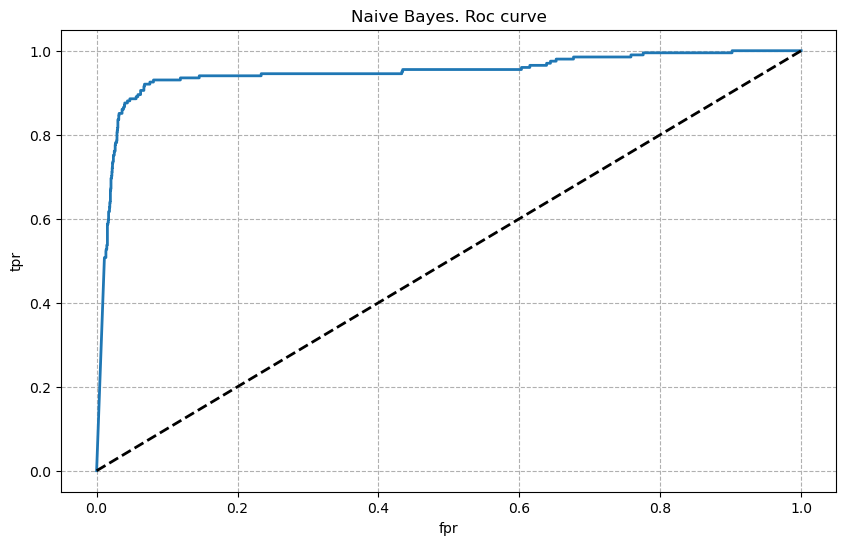

In [86]:
y_proba= qda.predict_proba(X)[:,1]
fpr, tpr, thresholds= roc_curve(y_bin, y_proba)
figure= plt.figure(figsize=(10,6))
plt.plot(fpr,tpr, linewidth= 2)
plt.title('Naive Bayes. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth= 2)
plt.grid(linestyle= 'dashed') 
plt.show()

## Logistic Regression

### Naive Attempt

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y_bin,test_size=0.2,random_state=42)

logreg= linear_model.LogisticRegression(C=1e5,max_iter=1000)

logreg.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,100000.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [89]:
y_pred = logreg.predict(X_test)

In [90]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       476
           1       0.74      0.78      0.76        36

    accuracy                           0.96       512
   macro avg       0.86      0.88      0.87       512
weighted avg       0.97      0.96      0.97       512



In [92]:
accuracy_score(y_test,y_pred)

0.96484375

### Cross Validation

In [ ]:
kf = KFold(n_splits=5)

kf.get_n_splits(X)

scoring = {
    'accuracy': 'accuracy',
    'auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

cv_results = cross_validate(logreg, X, y_bin, cv=kf, scoring=scoring, return_train_score=True)

In [95]:
cv_results

{'fit_time': array([0.0491519 , 0.01731324, 0.01244092, 0.01436019, 0.01567888]),
 'score_time': array([0.00522804, 0.0032959 , 0.00311613, 0.00339985, 0.00307584]),
 'test_accuracy': array([0.95507812, 0.9295499 , 0.97455969, 0.95694716, 0.97260274]),
 'train_accuracy': array([0.97015656, 0.97066015, 0.96430318, 0.97359413, 0.96479218]),
 'test_auc': array([0.81135903, 0.9800235 , 0.97573099, 0.89307272, 0.95919921]),
 'train_auc': array([0.97053564, 0.94338755, 0.950706  , 0.96469667, 0.95371821]),
 'test_f1': array([0.3030303 , 0.69491525, 0.8115942 , 0.42105263, 0.875     ]),
 'train_f1': array([0.82621083, 0.73913043, 0.76375405, 0.85      , 0.73333333]),
 'test_precision': array([0.35714286, 0.93181818, 0.84848485, 0.33333333, 0.90740741]),
 'train_precision': array([0.85798817, 0.82524272, 0.81944444, 0.88439306, 0.77952756]),
 'test_recall': array([0.26315789, 0.55405405, 0.77777778, 0.57142857, 0.84482759]),
 'train_recall': array([0.7967033 , 0.66929134, 0.71515152, 0.8181818

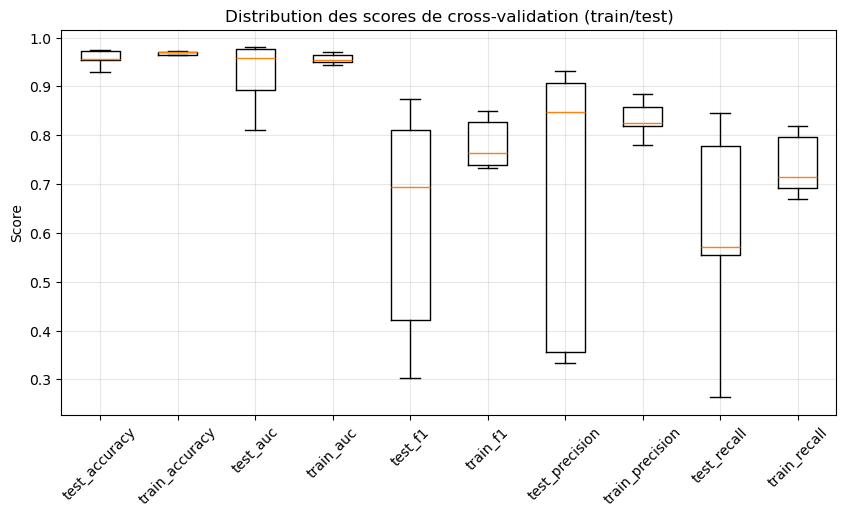

In [96]:
keys = [key for key in cv_results.keys() if key.startswith('test') or key.startswith('train')]
values = [cv_results[key] for key in keys]

plt.figure(figsize=(10, 5))
plt.boxplot(values)
plt.xticks(range(1, len(keys) + 1), keys, rotation=45)
plt.title("Distribution des scores de cross-validation (train/test)")
plt.ylabel("Score")
plt.grid(True, alpha=0.3)
plt.show()

### ROC Curb

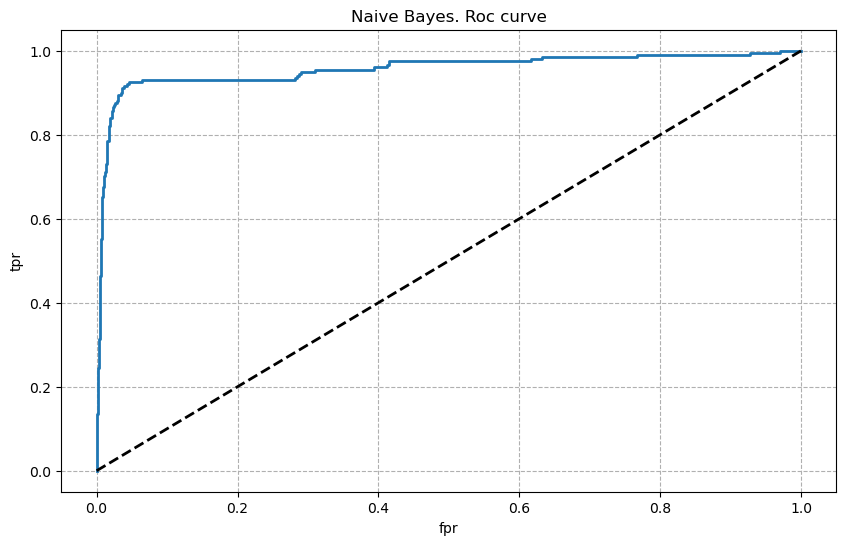

In [97]:
y_proba= logreg.predict_proba(X)[:,1]
fpr, tpr, thresholds= roc_curve(y_bin, y_proba)
figure= plt.figure(figsize=(10,6))
plt.plot(fpr,tpr, linewidth= 2)
plt.title('Naive Bayes. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth= 2)
plt.grid(linestyle= 'dashed') 
plt.show()

## K-NN model

### Naive Attempt

In [98]:
knn= KNeighborsClassifier(n_neighbors=5)

X_train, X_test, y_train, y_test = train_test_split(X,y_bin, test_size=0.2, random_state=42)

knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [99]:
y_pred = knn.predict(X_test)

In [101]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.966796875
Precision: 0.9672390647226173
Recall: 0.966796875
F1-score: 0.9670068367111765


In [103]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       476
           1       0.76      0.78      0.77        36

    accuracy                           0.97       512
   macro avg       0.87      0.88      0.87       512
weighted avg       0.97      0.97      0.97       512



### Cross Validation

In [104]:
kf = KFold(n_splits=5)

kf.get_n_splits(X)

scoring = {
    'accuracy': 'accuracy',
    'auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

cv_results = cross_validate(logreg, X, y_bin, cv=kf, scoring=scoring, return_train_score=True)

In [105]:
cv_results

{'fit_time': array([0.04196   , 0.01746678, 0.01261091, 0.014189  , 0.015872  ]),
 'score_time': array([0.00629401, 0.00336623, 0.00299096, 0.00373888, 0.00319481]),
 'test_accuracy': array([0.95507812, 0.9295499 , 0.97455969, 0.95694716, 0.97260274]),
 'train_accuracy': array([0.97015656, 0.97066015, 0.96430318, 0.97359413, 0.96479218]),
 'test_auc': array([0.81135903, 0.9800235 , 0.97573099, 0.89307272, 0.95919921]),
 'train_auc': array([0.97053564, 0.94338755, 0.950706  , 0.96469667, 0.95371821]),
 'test_f1': array([0.3030303 , 0.69491525, 0.8115942 , 0.42105263, 0.875     ]),
 'train_f1': array([0.82621083, 0.73913043, 0.76375405, 0.85      , 0.73333333]),
 'test_precision': array([0.35714286, 0.93181818, 0.84848485, 0.33333333, 0.90740741]),
 'train_precision': array([0.85798817, 0.82524272, 0.81944444, 0.88439306, 0.77952756]),
 'test_recall': array([0.26315789, 0.55405405, 0.77777778, 0.57142857, 0.84482759]),
 'train_recall': array([0.7967033 , 0.66929134, 0.71515152, 0.8181818

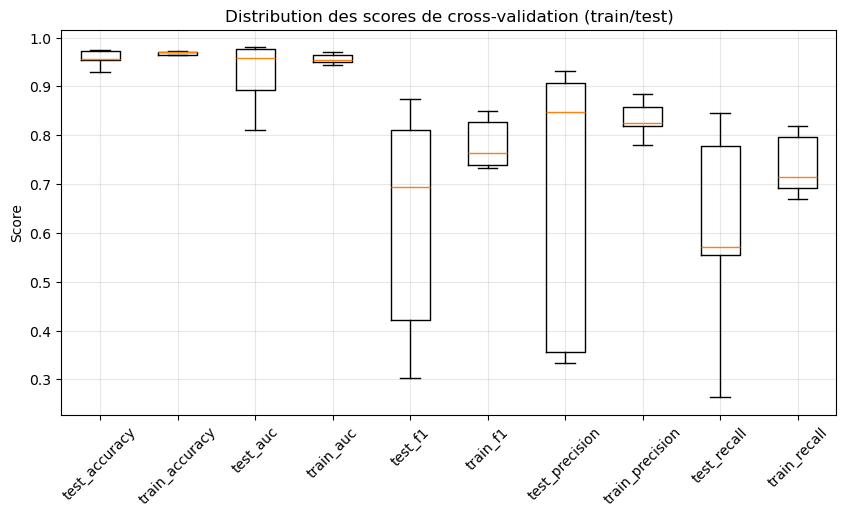

In [107]:
keys = [key for key in cv_results.keys() if key.startswith('test') or key.startswith('train')]
values = [cv_results[key] for key in keys]

plt.figure(figsize=(10, 5))
plt.boxplot(values)
plt.xticks(range(1, len(keys) + 1), keys, rotation=45)
plt.title("Distribution des scores de cross-validation (train/test)")
plt.ylabel("Score")
plt.grid(True, alpha=0.3)
plt.show()

### ROC Curb

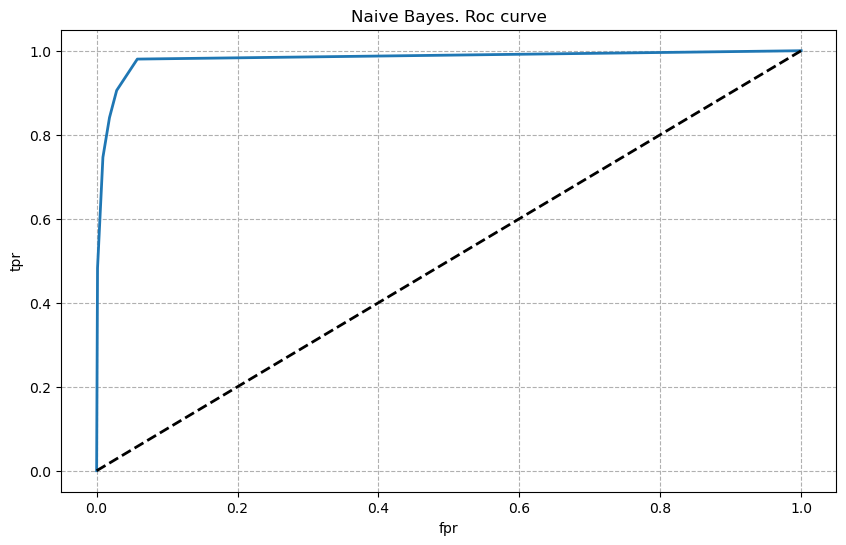

In [108]:
y_proba= knn.predict_proba(X)[:,1]
fpr, tpr, thresholds= roc_curve(y_bin, y_proba)
figure= plt.figure(figsize=(10,6))
plt.plot(fpr,tpr, linewidth= 2)
plt.title('Naive Bayes. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth= 2)
plt.grid(linestyle= 'dashed') 
plt.show()

## Bagging

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y_bin,test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
treefit = model.fit(X_train, y_train)
y_pred = treefit.predict_proba(X_test)

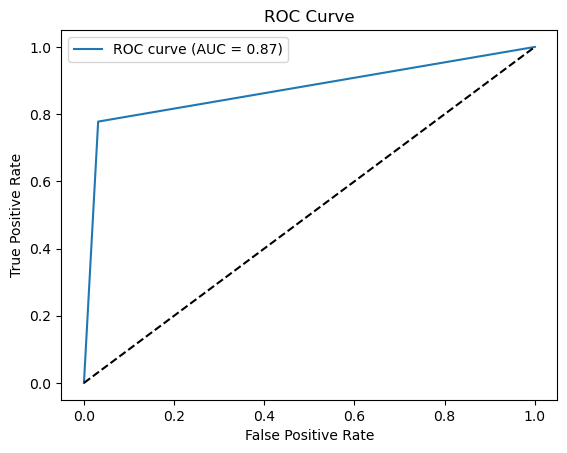

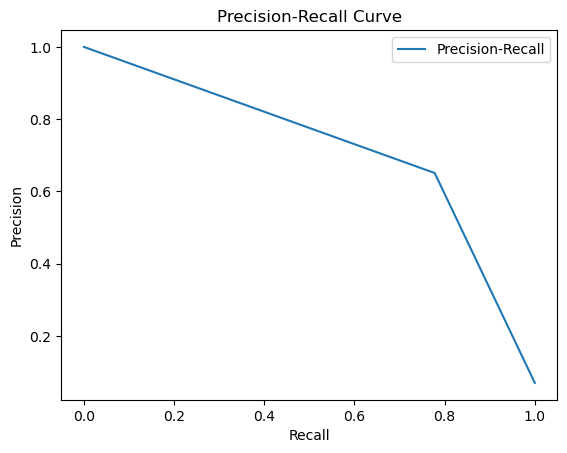

In [125]:
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred[:, 1])
plt.plot(fpr, tpr, label="ROC curve (AUC = %.2f)" % roc_auc_score(y_test, y_pred[:, 1]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Courbe Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred[:, 1])
plt.plot(recall, precision, label="Precision-Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


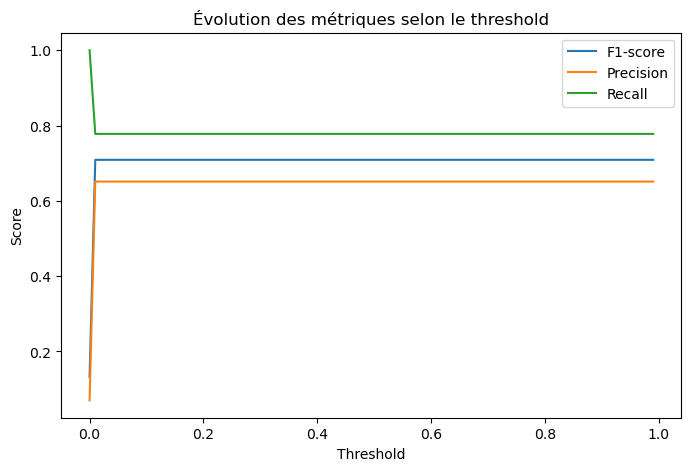

In [126]:
thresholds = np.arange(0.0, 1.0, 0.01)
f1_scores = []
precisions = []
recalls = []

for t in thresholds:
    y_pred_class = (y_pred[:, 1] >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_class))
    precisions.append(precision_score(y_test, y_pred_class))
    recalls.append(recall_score(y_test, y_pred_class))

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(thresholds, f1_scores, label="F1-score")
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Évolution des métriques selon le threshold")
plt.show()

In [127]:
best_t = thresholds[np.argmax(f1_scores)]
print("Meilleur seuil selon F1-score :", best_t)

Meilleur seuil selon F1-score : 0.01


In [128]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])
J = tpr - fpr
best_t = thresholds[np.argmax(J)]
print("Seuil optimal selon Youden :", best_t)

Seuil optimal selon Youden : 1.0


In [129]:
y_pred_class = (y_pred[:, 1] > 0.01).astype(int)

print("Accuracy :", accuracy_score(y_test, y_pred_class))
print("Precision :", precision_score(y_test, y_pred_class))
print("Recall :", recall_score(y_test, y_pred_class))
print("F1-score :", f1_score(y_test, y_pred_class))
print("ROC-AUC :", roc_auc_score(y_test, y_pred[:, 1]))

print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred_class))
print("\nClassification Report :\n", classification_report(y_test, y_pred_class))

Accuracy : 0.955078125
Precision : 0.6511627906976745
Recall : 0.7777777777777778
F1-score : 0.7088607594936709
ROC-AUC : 0.8731325863678804

Confusion Matrix :
 [[461  15]
 [  8  28]]

Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       476
           1       0.65      0.78      0.71        36

    accuracy                           0.96       512
   macro avg       0.82      0.87      0.84       512
weighted avg       0.96      0.96      0.96       512

